# Objective of the report:
Main mission of the report is to find valuable data from a data set called netflix reviews which are reviews written by customers about the Netflix application. Objective is to find what makes the application successful and what are the areas that the app can be improved by the team. In order to do that I decided to perform the TF-IDF technique which will allow me to detect which words are most valuable and use it to find comments and based on findings suggest new improvements for the application. Also based on TF IDF I can predict if future customers are gonna enjoy the application.

Importing important libraries for the project

In [17]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Uploading data set for futher data mining:
https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated

In [3]:
from google.colab import files
f = files.upload()

Saving netflix_reviews.csv to netflix_reviews.csv


Loading first few rows of the data set in order to see what kind of data I can find in it

In [4]:
df1 = pd.read_csv("netflix_reviews.csv")
display(df1.head())

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
1,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626
2,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,NaN,2024-06-18 09:52:52,NaN
3,abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc,Mann Official,No I'm not able to remove this app anymore 0 o...,1,0,NaN,2024-06-18 09:50:21,NaN
4,b0687627-7eb4-4c74-ac88-ba3cef068484,ashutosh gokani,Thy are supporting maharaj movie ...thts not a...,1,9,8.118.1 build 10 50703,2024-06-18 09:48:55,8.118.1 build 10 50703


After seeing what kind of data I have in the data set I decided to perform data set checking in order to find if there are any missing values that need cleaning.


In this part of the code I created a function check_missing_values that checks every column and if there is any missing value it displays the sum of them for each column.

In [5]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        print("Missing values found:")
        print(missing_values[missing_values > 0])

data = pd.read_csv("netflix_reviews.csv")
check_missing_values(data)

Missing values found:
userName                    2
content                     2
reviewCreatedVersion    16636
appVersion              16636
dtype: int64


So after checking i noticed that i have missing values in 2 columns User name and content. Because username is not important when it comes to further data mining I decided to put "Example name" into missing value. But when it comes to content i decided to fill it with "no comment" because this column is text based so i cannot perform any prediction technique to predict those values. When it comes to revireCreated Version and appVersion i decided to ignore those values as they do not bring any valuable information to my research.

In [6]:
file_path = 'netflix_reviews.csv'
df = pd.read_csv(file_path)
missing_rows = df[df[['userName', 'content']].isnull().any(axis=1)]
print("Rows with missing values:")
display(missing_rows)


Rows with missing values:


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
420,fc0ad6f5-1661-403f-82cd-86ef6acf2b40,NaN,Very upset with the show storybook time. I was...,1,0,8.112.1 build 6 50665,2024-06-15 17:01:43,8.112.1 build 6 50665
3923,a73c931f-5cce-4863-b1ae-40101455f137,Maria Wiley,NaN,5,0,8.114.0 build 19 50680,2024-05-21 16:56:29,8.114.0 build 19 50680
4274,839d55ed-ba9e-4753-a178-5799b9f86ffc,Myris Guilanda,NaN,2,0,NaN,2024-05-19 13:52:42,NaN
15162,22c66c53-4205-4b04-aa15-00dbe68f6ef7,NaN,"FPS crashes to below 12, audio isn't synced wi...",2,0,NaN,2023-09-17 14:01:54,NaN


This part of the code performs data cleaning by filling missing data with values that won't impact my research and will not reduce the number of data in the dataset which will make data more accurate.


I wrote a code which fills missing values in 2 columns userName and content with adequate values. After all cleaning code is putting all data into cleaned .csv which will be used in further data mining.

In [7]:
file_path = 'netflix_reviews.csv'
df = pd.read_csv(file_path)

df['userName'] = df['userName'].fillna('Example NAME')
df['content'] = df['content'].fillna('No comment')

display(df)
new_file_path = 'netflix_reviews_updated.csv'
df.to_csv(new_file_path, index=False)


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
1,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626
2,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,NaN,2024-06-18 09:52:52,NaN
3,abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc,Mann Official,No I'm not able to remove this app anymore 0 o...,1,0,NaN,2024-06-18 09:50:21,NaN
4,b0687627-7eb4-4c74-ac88-ba3cef068484,ashutosh gokani,Thy are supporting maharaj movie ...thts not a...,1,9,8.118.1 build 10 50703,2024-06-18 09:48:55,8.118.1 build 10 50703
...,...,...,...,...,...,...,...,...
113602,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
113603,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
113604,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
113605,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


After the cleaning process I performed another check of the data to make sure that process of cleaning went successful and there are no missing data that I need to take care of.
To do this I used a function  that I created earlier, "check_missing_values".

In [8]:
data = pd.read_csv("netflix_reviews_updated.csv")
check_missing_values(data)

Missing values found:
reviewCreatedVersion    16636
appVersion              16636
dtype: int64


Here i performed simple function to check the data set to get some basic informations about it. Like number of rows, columns and indexes.

In [9]:
def load_and_check_dataset(file_path):
        data = pd.read_csv(file_path)
        print(f"Number of rows: {data.shape[0]}")
        print(f"Number of columns: {data.shape[1]}")
        print("Columns:")
        print(data.columns)

file_path = 'netflix_reviews_updated.csv'
load_and_check_dataset(file_path)


Number of rows: 113607
Number of columns: 8
Columns:
Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


So after checking for missing values and cleaning, knowing basic information I got into identifying what type of data is in the data set.
I created a function which goes through every column and all string type values assess the 'object' type and numeric ones into 'int' or 'float' . By doing that I got information about what kind of techniques I can use in data mining.


In the code I created for loop which is going through data in columns and putting it into the correct type. That way i also check if there are any incorrect values in the data set so i wont have string values in the Int column.

In [10]:
def validate_data_types(file_path):
    try:
        data = pd.read_csv(file_path)

        print("These are column data-types:")
        print(data.dtypes)
        print("\n")
        for col in data.columns:
            dtype = data[col].dtype
            if dtype == 'object':
                non_string_values = data[col].apply(lambda x: isinstance(x, str))
                if not non_string_values.all():
                    print(f"Column '{col}' contains non-string values in object dtype.")

            elif dtype == 'int64' or dtype == 'float64':
                if data[col].isnull().any():
                    print(f"Column '{col}' contains NaN or null values.")

    except Exception as e:
        print(f"Error occurred: {str(e)}")

file_path = 'netflix_reviews_updated.csv'
validate_data_types(file_path)


These are column data-types:
reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object


Column 'reviewCreatedVersion' contains non-string values in object dtype.
Column 'appVersion' contains non-string values in object dtype.


In order to perform any data mining, first i need to understand the data and find distribution and patterns. To do that i decided to perform two statistical calculations that will allow me to understand distribution of ratings. First method is skewness which is measurement of symmetry of the data distribution and second one is kurtosis which measures concentration of data points around extreme values.

In [11]:
file_path = 'netflix_reviews_updated.csv'
data = pd.read_csv(file_path)

ratings_column = 'score'
ratings_data = data[ratings_column]

skewness_value = skew(ratings_data)
kurtosis_value = kurtosis(ratings_data)

print(f"Skewness of {ratings_column}: {skewness_value}")
print(f"Kurtosis of {ratings_column}: {kurtosis_value}")



Skewness of score: 0.16291223477393033
Kurtosis of score: -1.6791340072249556


I decided to write simple code which will calculate those two measurements based on the score column.
The results showed that Skewness indicates that it is positive (0.16291223477393033) which means that distribution is skewed to the right tail which means that most of the ratings are positive.
In Kurtosis results showed that its (-1.6791340072249556) which means that data is Normally distributed and it has some extreme values.

After understanding the distribution of the data I created simple data visualizations that will show patterns that can be found in the data.
First I created a function that plots a bar graph with a score which is the rating that users left and counts the number of each score. My code is going through columns with scores and counting each score total. Later its plotting bar graph with x label 'score' and y label 'count' and then its presenting its values.

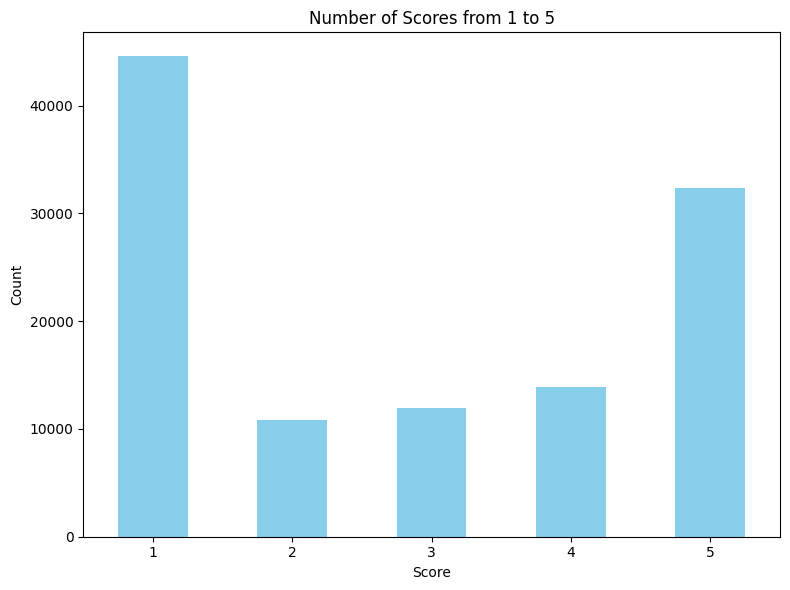

In [12]:
def plot_scores_bar_graph(file_path):
        data = pd.read_csv(file_path)

        scores = data['score'].dropna().astype(int)
        scores = scores[scores.between(1, 5)]

        score_counts = scores.value_counts().sort_index()

        plt.figure(figsize=(8, 6))
        score_counts.plot(kind='bar', color='skyblue')
        plt.xlabel('Score')
        plt.ylabel('Count')
        plt.title('Number of Scores from 1 to 5')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


file_path = 'netflix_reviews_updated.csv'
plot_scores_bar_graph(file_path)


Next two visualizations are used to show how some of the comments are more valuable than others because of the thumbs up number. This shows that people are intrigued by the comment and they agree with it.

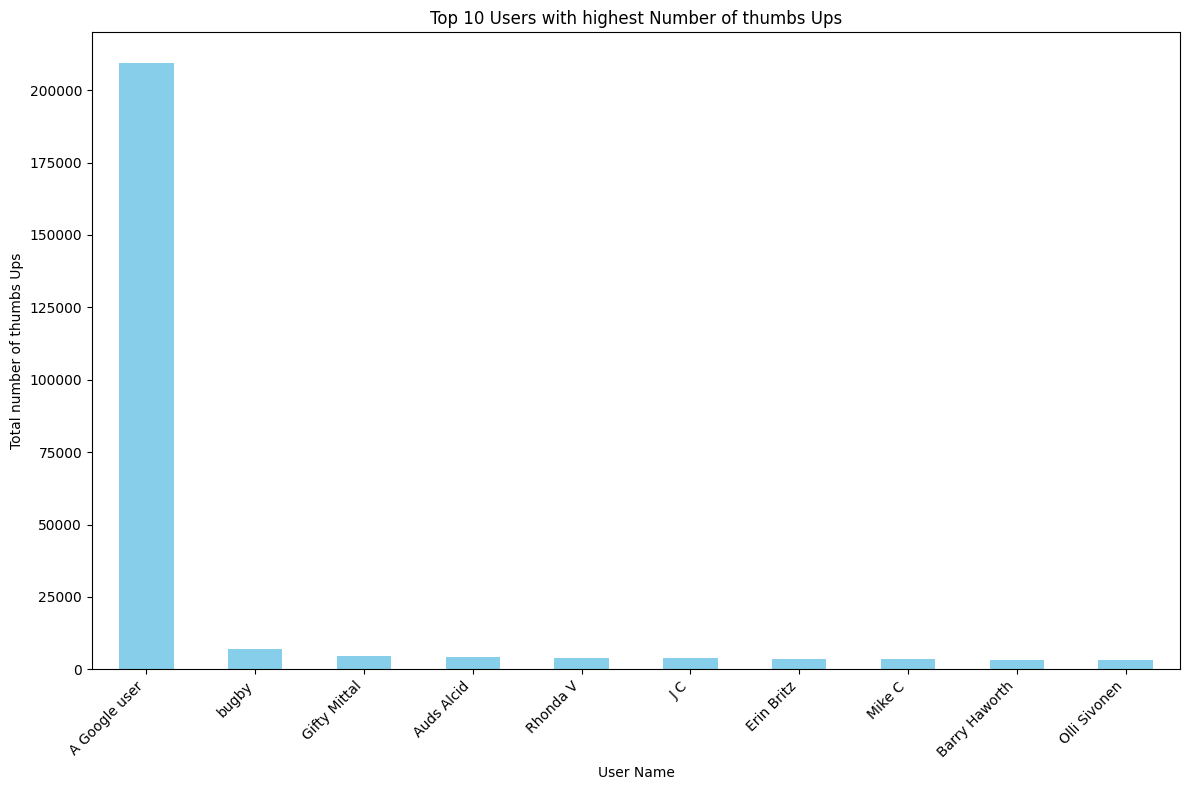

In [13]:
file_path = 'netflix_reviews.csv'
df = pd.read_csv(file_path)

user_thumbs_up = df.groupby('userName')['thumbsUpCount'].sum()
top_10_users = user_thumbs_up.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_10_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users with highest Number of thumbs Ups')
plt.xlabel('User Name')
plt.ylabel('Total number of thumbs Ups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


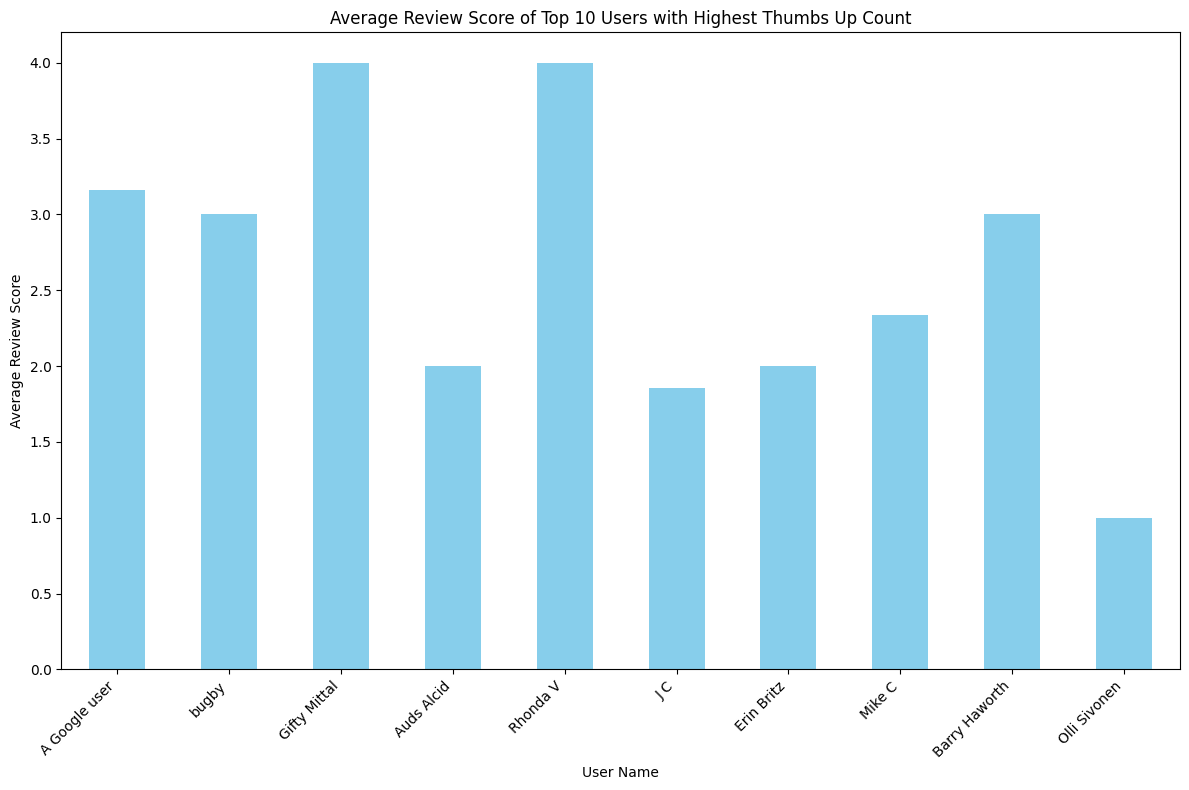

In [14]:
file_path = 'netflix_reviews_updated.csv'
df = pd.read_csv(file_path)

user_thumbs_up = df.groupby('userName')['thumbsUpCount'].sum()

top_10_users = user_thumbs_up.sort_values(ascending=False).head(10).index

top_10_reviews = df[df['userName'].isin(top_10_users)]

user_scores = top_10_reviews.groupby('userName')['score'].mean()

user_scores = user_scores.loc[top_10_users]

plt.figure(figsize=(12, 8))
user_scores.plot(kind='bar', color='skyblue')
plt.title('Average Review Score of Top 10 Users with Highest Thumbs Up Count')
plt.xlabel('User Name')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In order to find out which words are most valuable I decided to use TF-IDF technique which will allow me to find the most valuable words in the content column and then assign them to comments which will help me find new things that can be improved in the app. Also based in TF-IDF i can create a prediction system which will allow me to predict new comments from potential customers.


In order to make TF-IDF first I had to perform a text pre-process in order to make sure that all text are written in the same way so I made sure that all the texts are in lowercase, removing any characters that are not letters or spaces. Then because my data set is too big I had to lower the number of comments I'm gonna use to make TF-IDF, I decided to settle on 10,000 as this is the number that my computer can handle and it doesn't take 30 min to produce results. Then in my code I had to remove any words that are very common in English text so they won't be used to count TF-IDF. Then code is getting information about the vocabulary and IDF from the comments, then transforming the comments into the TF-IDF matrix. Next code is retrieving feature words corresponding to columns in the TF-IDF matrix. Then code is converting the matrix into a dense matrix.
and lastly Creates a pandas DataFrame from the dense matrix. Also for improvements I decided to pin the whole comment to 100 most valuable words so I can find out which features are good and what can be improved.

In [15]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df = pd.read_csv('netflix_reviews.csv')

comments = df['content'].dropna()[:10000]

comments_preprocessed = comments.apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

tfidf_matrix = tfidf_vectorizer.fit_transform(comments_preprocessed)

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

tfidf_df['comment'] = comments.reset_index(drop=True)

tfidf_df['max_tfidf'] = tfidf_df[feature_names].max(axis=1)

top_comments = tfidf_df.sort_values(by='max_tfidf', ascending=False).head(100)

for index, row in top_comments.iterrows():
    print(f"Comment {index}:")
    print(row['comment'])
    print("TF-IDF Scores:")
    for feature in feature_names:
        if row[feature] > 0:
            print(f"{feature}: {row[feature]}")
    print()


Comment 0:
Good
TF-IDF Scores:
good: 1.0

Comment 1635:
Good
TF-IDF Scores:
good: 1.0

Comment 4385:
Cool
TF-IDF Scores:
cool: 1.0

Comment 1579:
Are bhai maje hi maje
TF-IDF Scores:
hi: 1.0

Comment 4389:
Man is mortal
TF-IDF Scores:
man: 1.0

Comment 4393:
Love it ❤️
TF-IDF Scores:
love: 1.0

Comment 4398:
No me dejaba ver nada porque no estaba en mi casa
TF-IDF Scores:
mi: 1.0

Comment 4401:
I like it
TF-IDF Scores:
like: 1.0

Comment 4404:
Ok
TF-IDF Scores:
ok: 1.0

Comment 4406:
Love
TF-IDF Scores:
love: 1.0

Comment 4415:
Great
TF-IDF Scores:
great: 1.0

Comment 1559:
Ok
TF-IDF Scores:
ok: 1.0

Comment 1557:
I do not liked it at all
TF-IDF Scores:
liked: 1.0

Comment 4418:
Bad
TF-IDF Scores:
bad: 1.0

Comment 4419:
Cool
TF-IDF Scores:
cool: 1.0

Comment 4420:
Digw difficult
TF-IDF Scores:
difficult: 1.0

Comment 1546:
Good
TF-IDF Scores:
good: 1.0

Comment 1542:
Amazing
TF-IDF Scores:
amazing: 1.0

Comment 4422:
So good can't describe
TF-IDF Scores:
good: 1.0

Comment 4425:
Not w

The results are top 100 comments with maximum TF-IDF. This showed me which comments are most valuable and contain valuable information that can help in improvements of the application. After manually checking the comments I can say that most of the comments are positive which confirms the distribution that skewness showed before.

So after calculating TF-IDF and getting valuable information I decided to perform a prediction for score to see what kind of rating to expect from future app users. To do that again i used preprocessing text function. I predicted the rating based on two factors rating(score) and content(review). Again i selected 10000 comments and ratings. I applied the preprocessing function and initialized the TF-IDF vectorizer. Then I decided to split data into training and test sets that will allow me to calculate precision of my predictions. Then i started to train a regression model. And use it to make predictions on test data set.

In [19]:
df = pd.read_csv('netflix_reviews.csv')
labels = df['score'].dropna()[:10000]

comments = df['content'].dropna()[:10000]

comments_preprocessed = comments.apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X = tfidf_vectorizer.fit_transform(comments_preprocessed)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

results = pd.DataFrame({'Training': y_test, 'Test': y_pred})
print("Traning data vs test data set :")
print(results.head(10))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Traning data vs test data set :
      Training  Test
6252         2     1
4684         5     1
1731         5     5
4742         5     5
4521         4     1
6340         1     1
576          1     5
5202         5     5
6363         1     1
439          5     5

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69       972
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00       149
           5       0.59      0.63      0.61       543

    accuracy                           0.58      2000
   macro avg       0.23      0.30      0.26      2000
weighted avg       0.44      0.58      0.50      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results showed that precision of the predictions were moderatly high. with highest of 0.59. Recall is used to caluclate f1-score which came out really high which is very good thing because it means that that prediciton system is very accurate. Highest f1-score 0.69.

In conclusion, the aim of this report was to gather valuable information that can help in improvements of the application. After performing all visualizations and calculating TF-IDF and making a prediction system. I got valuable comments that indicate that there are two areas that application can be improved, one is login and sign in. Many people found it hard to login and connect to the application. But also it showed that there are a lot of users that are really happy with how the application is working and they love it.